# Linear Regression and Regularization

## 1. Assumption
1. __Linearity and additivity__: 1). There should be a linear relationship between dependent and independent variables. It is also important to check for outliers since linear regression is sensitive to outlier effects. 2). The impact of change in independent variables values should have additive impact on dependent variables.

  __How to diagnose__: The linearity assumption can best be tested with scatter plots.
  
  __How to fix__: Consider applying a nonlinear transformation to the dependent and/or independent variables. Another possibility to consider is adding another regressor that is a nonlinear function of one of the other variables.
      
2. __Statistical independence of errors__: The residuals are independent, in particular, no correlation between consecutive errors in the case of time series data.

   __How to diagnose__: To test for non-time-series violations of independence, you can look at plots of the residuals versus independent variables. The residuals should be randomly and symmetrically distributed around zero.
   
   __How to fix__: It could be due to a violation of the linearity assumption or due to bias that is explainable by omitted variables (say, interaction terms or dummies for identifiable conditions).

3. __Normality of residuals__: Distribution of residuals should be normal distributed. 

  __How to diagnose__: This assumption can best be checked with a histogram or a Q-Q plot. 

  __How to fix__: violations of normality often arise either because (a) the distributions of the dependent and/or independent variables are themselves significantly non-normal, and/or (b) the linearity assumption is violated. In such cases, a nonlinear transformation of variables might cure both problems. 

  __Note__:  1). The dependent and independent variables in a regression model do not need to be normally distributed by themselves--only the prediction errors need to be normally distributed. But if the distributions of some of the variables that are random are extremely asymmetric or long-tailed, it may be hard to fit them into a linear model whose errors will be normally distributed. 
  2). $\hat{y_i}=x_i\beta+\hat{\epsilon_i}$, $\hat{\epsilon_i}$ is an observation here and $\hat{\epsilon_1}...\hat{\epsilon_n}$ should follow a normal distribution.
  
4. __Homoscedasticity__: Variance of errors should be constant versus, a. Time, b. The predictions, c. Independent variable values. 

  __How to diagnose__: Look at a plot of residuals versus predicted values and, in the case of time series data, a plot of residuals versus time. To be really thorough, you should also generate plots of residuals versus independent variables to look for consistency there as well. 
  
  __How to fix__: If the dependent variable is strictly positive and if the residual-versus-predicted plot shows that the size of the errors is proportional to the size of the predictions, a log transformation applied to the dependent variable may be appropriate. 
  
  __Note__: $y_i=x_i\beta+\epsilon_i$, $\epsilon_i$ is a reandom variable here and has a variance $\sigma^2_i$

5. __ No multicollinearity__:  linear regression assumes that there is little or no multicollinearity in the data.  Multicollinearity occurs when the independent variables are too highly correlated with each other.

  __How to diagnose__:  
   * Correlation matrix 
   * Tolerance：With T < 0.1 there might be multicollinearity in the data and with T < 0.01 there certainly is.
   $$T_k=1 - R_k^2$$
   * Variance Inflation Factor (VIF): If the VIF is between 5-10, multicolinearity is likely present and you should consider dropping the variable.
   $$VIF_k = {1}/{(1 - R_k^2)}$$ where $R^2_k$  is the $R^2$-value obtained by regressing the kth predictor on the remaining predictors.  

  __How to fix__: Centering the data (that is deducting the mean of the variable from each score) might help to solve the problem. The simplest way to address the problem is to remove independent variables with high VIF values.

## 2. Prepare Data for Linear Regression
* Linear Assumption (log transform)
* Remove Noise (remove outlier)
* Remove Collinearity (overfit)
* Gaussian Distributions (log or Boxcox transform)
* Rescale Inputs (standardization or normalization)

##  3. Learning Algorithms Used to Estimate the Coefficients
* __Simple Linear Regression__

When there is a single input variable (x), the method is referred to as simple linear regression. The function of simple linear regression is:
$$y=b_0+b_1 x$$

We need to find the values $b_0$ and $b_1$ that minimize 
$$Q=\sum_{i=1}^{n}(y_i-\hat{y_i})^2$$

Take the derivative with respect to $b_0$ and $b_1$, set to 0 and solve for $b_0$ and $b_1$ and get the least squares estimates for $b_0$ and $b_1$:
$$b_0 = \bar{y}-b_1\bar{x}$$
and 
$$b_1=\frac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^{n}(x_i-\bar{x})^2}$$

* __Ordinary Least Squares__

Consider an overdetermined system
$$\sum_{j=1}^{n}X_{ij}\beta_j=y_i (i=1,2,...,m)$$
of m linear equations in n unknown coefficients, $\beta_1, \beta_2, ..., \beta_n$ with $m>n$.

Such a system usually has no sollution, so the goal is instead to find the coefficients $\beta$ which fit the eqautions "best", in the sense of solving the quadratic minimization problem
$$\hat{\beta}=\underset{\beta}{\operatorname{argmin}}S(\beta)$$
where the objective function $S$ is given by
$$S(\beta)=\sum_{i=1}^{m}\mid y_i-\sum_{j=1}^{n}X_{ij}\beta_j\mid^2=\lVert y-X\beta\lVert ^2$$


normal equation (closed-form solution to a least squares fit):
$$\hat{\beta}=(X^TX)^{-1}X^T\overrightarrow{y}$$

When we have more than one input we can use Ordinary Least Squares to estimate the values of the coefficients. The Ordinary Least Squares procedure seeks to minimize the sum of the squared residuals.

* __Gradient Descent__


Gradient descent is an optimization algorithm used to find the values of parameters (coefficients) of a function (f) that minimizes a cost function (cost).

The cost function of linear regression is (squared error function):
$$J(\theta)=\frac{1}{2m}\sum_{i=1}^{m}(\hat{y_i}-y_i)^2$$

For a simple linear regression model, the process of gradient descent would be like:
To minimize:
$$J(\theta_0, \theta_1)=\frac{1}{2m}\sum_{i=1}^{m}((\theta_0+\theta_1x^{(i)})-y^{(i)})^2$$

We will start off by some initial guesses for the values of $\theta_0$ and $\theta_1$ and repeat until convergence:

$$\{\theta_j := \theta_j -\alpha \frac{\partial}{\partial \theta_j}f(\theta_0, \theta_1)\;\;\;for\;j=0, 1\}$$

Here, $\alpha$ is called the learning rate, and it determines how big a step needs to be taken when updating the parameters. The learning rate is always a positive number.


Gradient Descent is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function. There are mainly 2 kinds of gradient descent methods:

  1) Batch gradient descent refers to calculating the derivative from all training data before calculating an update.

  2) Stochastic gradient descent refers to calculating the derivative from each training data instance and calculating the update immediately.

* __Regularization__

These seek to both minimize the sum of the squared error of the model on the training data (using ordinary least squares) but also to reduce the complexity of the model (like the number or absolute size of the sum of all coefficients in the model).

## 4. Bias-variance Tradeoff
In statistics and machine learning, the bias–variance tradeoff is the problem of simultaneously minimizing two sources of error that prevent supervised learning algorithms from generalizing beyond their training set.

The derivation of the bias–variance decomposition for squared error proceeds as follows:

$$
\begin{split}
E[(y-\hat{f})^2] &= E[y^2+\hat{f}^2-2y\hat{f}] \\
&= E[y^2]+E[\hat{f}^2]-E[2y\hat{f}]\\
&= Var[y]+E[y]^2+Var[\hat{f}]+E[\hat{f}]^2-2fE[\hat{f}]\\
&= Var[y]+Var[\hat{f}]+(f^2-2fE[\hat{f}]+E[\hat{f}]^2)\\
&= Var[y]+Var[\hat{f}]+(f-E[\hat{f}])^2\\
&= \sigma^2+Var[\hat{f}]+Bias[\hat{f}]^2\\
\end{split}\
$$

The bias is error from erroneous assumptions in the learning algorithm. High bias can cause an algorithm to miss the relevant relations between features and target outputs (underfitting).
 
The variance is error from sensitivity to small fluctuations in the training set. High variance can cause an algorithm to model the random noise in the training data, rather than the intended outputs (overfitting).

![BVT](./Bias Variance Tradeoff.png)

Baasically, there are two methods to overcome overfitting:
* Reduce the model complexity
* Regularization

## 5. Regularized Linear Models
### 5.1 Ridge Regression
Ridge Regression (also called Tikhonov regularization) is a regularized version of Linear Regression: a regularization term equal to $\alpha\sum_{i=1}^{n} \theta_i^2$ is added to the cost function. This forces the learning algorithm to not only fit the data but also keep the model
weights as small as possible.

Ridge Regression cost function:

$J(\theta) = MSE(\theta) + \alpha\sum_{i=1}^{n} \theta_i^2$

### 5.2 Lasso Regression
Least Absolute Shrinkage and Selection Operator Regression (simply called Lasso Regression) is another regularized version of Linear Regression: just like Ridge Regression, it adds a regularization term to the cost function, but it uses the L1 norm
of the weight vector instead of half the square of the L2 norm.

Lasso Regression cost function:

$J(\theta) = MSE(\theta) + \alpha\sum_{i=1}^{n} |\theta_i|$

### 5.3 Elastic Net
Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The regularization term is a simple mix of both Ridge and Lasso’s regularization terms, and you can control the mix ratio r. When r = 0, Elastic Net is equivalent to Ridge
Regression, and when r = 1, it is equivalent to Lasso Regression.

Elastic Net cost function:

$J(\theta) = MSE(\theta) + r\alpha\sum_{i=1}^{n} |\theta_i| + \frac{1-r}{2}\alpha\sum_{i=1}^{n}\theta_i^2$

### 5.4 Geometric Interpretation 
The lasso performs L1 shrinkage, so that there are "corners'' in the constraint, which in two dimensions corresponds to a diamond. If the sum of squares "hits'' one of these corners, then the coefficient corresponding to the axis is shrunk to zero.

![Geometric Interpretation](./Lasso and Ridge.gif)

## 6.  Important Statisitcs
When there is no association between Y and X, the best predictor of each observation is $\bar{y}=\hat{\beta_0}$. In this case, the toal variation can be denoted as $TSS=\sum(y_i-\bar{y})^2$, the __Total Sum of Squares__.


When there is an association between Y and X, the best predictor of each observation is $\hat{y_i}=\hat{\beta_0}+\hat{\beta_1}x_i$. In this case, the error variation can be denoted as $SSE=\sum(y_i-\hat{y_i})^2$, the __Error Sum of Squares__.


The difference between TSS and SSE is the variation "explained" by the regression of Y on X. It represents the difference between the fitted values and the mean: $SSR=\sum(\hat{y_i}-\bar{y})^2$, the __Regression Sum of Squares__.


 The relationship among them is: $TSS=SSE+SSR$, $\sum(y_i-\bar{y})^2=\sum(y_i-\hat{y_i})^2+\sum(\hat{y_i}-\bar{y})^2$
 

A common way to summarize how well a linear regression model fits the data is via the coefficient of determination or $R^2$. It is the proportion of variation in the forecast variable that is explained by the regression model. It can be calculated as:$$R^2 = \frac{\sum(\hat{y_i}-\bar{y})^2}{\sum(y_i-\bar{y})^2}=\frac{SSR}{TSS}$$

The __$R^2$ value__ is commonly used, often incorrectly, in forecasting. There are no set rules of what a good $R^2$ value is and typical values of $R^2$ depend on the type of data used. Validating a model’s out-of-sample forecasting performance is much better than measuring the in-sample $R^2$ value.

  
The __Adjusted $R^2$__ is a modified version of $R^2$ that has been adjusted for the number of predictors in the model. The adjusted $R^2$ increases only if the new term improves the model more than would be expected by chance. It decreases when a predictor improves the model by less than expected by chance. The adjusted $R^2$ can be negative, but it’s usually not. It is always lower than the $R^2$. 
$$R_{adj}^2=1-[\frac{(1-R^2)(n-1)}{n-k-1}]$$
    where: 
   * n is the number of points in your data sample  
   * k is the number of variables in your model, excluding the constant.

__Mean Squared Error (MSE)__ measures the average of the squares of the errors or deviations. If $\hat{y}$ is a vector of n predictions, and $y$ is the vector of observed values corresponding to the inputs to the function which generated the predictions, then MSE of the predictor can be estimated by$$MSE=\frac{1}{n}\sum_{i=1}^n(\hat{y_i}-y_i)^2$$


__ANOVA__ calculations are displayed in an analysis of variance table, which has the following format for multiple linear regression:

| Source | Degrees of Freedom | &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Sum of squares&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; | &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Mean Square&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; | &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$F_{obs}$&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; | &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;P-value &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; |
| :----- | :-----: | :----- | :----- | :-----: | :-----: |
| Model | p | $SSR=\sum(\hat{y_i}-\bar{y})^2$ | $MSR=\frac{SSR}{p}$ | $F=\frac{MSR}{MSE}$ | $P(F_{p, n-p-1} \ge F_{obs})$ |
| Error | n-p-1 | $SSE=\sum(y_i-\hat{y_i})^2$ | $MSE=\frac{SSE}{n-p-1}$ | &nbsp; | &nbsp; |
| Total | n-1 | $TSS=\sum(y_i-\bar{y})^2$ | &nbsp; | &nbsp; | &nbsp; |

## 7. Hypotheses Tests for the Slopes
__F test: testing all slope parameters equal 0__

For a multiple regression model with intercept, we want to test the following null hypothesis and alternative hypothesis:

$H_0: \beta_1 = \beta_2 = ... = \beta_{p-1} = 0$
 
$H1: \beta_j \neq 0$, for at least one value of $j$

This test is known as the overall __F-test for regression__. The test statistic should be $F=\frac{MSR}{MSE}$ and we should find a $(1-\alpha)100\%$ confidence interval $I$ for $(p, n-p-1)$ degrees of freedom using an F table. Accept the null hypothesus if $F \in I$, reject if $F \notin I$.
   
__T test: testing one slope parameter is 0__

The  test is used to check the significance of individual regression coefficients in the multiple linear regression model. The hypothesis statements to test the significance of a particular regression coefficient $\beta_j$ are:

$H_0: \beta_j = 0$
 
$H1: \beta_j \neq  0$

The test statistic for this test is based on the t distribution: $T_0 = \frac{\hat{\beta_j}}{se(\hat{\beta_j})}$

## 8. Vairable Selection Criterion
__Akaike's Information Criterion (AIC)__

A simple formula for the calculation of the AIC in the OLS framework is:
$$AIC=n*log(\frac{SSE}{n})+2k$$
Where SSE means Sum of Squared Errors $\sum(y_i-\hat{y_i})^2$, n is the sample size, and k is the number of predictors in the model plus one for the intercept. 

__Bayes Information Criterion (BIC)__

A simple formula for the calculation of the BIC in the OLS framework is:
$$BIC=n*log(\frac{SSE}{n})+klog(n)$$
Larger models will fit better and so have smaller SSE but use more parameters. Thus the best choice of model will balance fit with model size. BIC penalizes larger models more heavily and so will tend to prefer smaller models in comparison to AIC. AIC and BIC can be used as selection criteria for other types of model too.

## 9. Prediction & Confidence Interval
* Confidence Interval: A confidence interval for $E(y|x^*)$, the average (expected) value of y for a given $x^*$, is
$$\hat{y}\pm t^{*}_{n-2}s_y\sqrt{\frac{1}{n}+\frac{(x^*-\bar{x})^2}{(n-1)s_x^2}}$$
* Prediction Interval: A prediction interval for y for a given $x^*$ is
$$\hat{y}\pm t^{*}_{n-2}s_y\sqrt{1+\frac{1}{n}+\frac{(x^*-\bar{x})^2}{(n-1)s_x^2}}$$

* Difference

 Confidence intervals tell you about how well you have determined the mean. The key point is that the confidence interval tells you about the likely location of the true population parameter.

 Prediction intervals tell you where you can expect to see the next data point sampled. The key point is that the prediction interval tells you about the distribution of values, not the uncertainty in determining the population mean.

 Prediction intervals must account for both the uncertainty in knowing the value of the population mean, plus data scatter. So a prediction interval is always wider than a confidence interval.

## 10. Pros and Cons
__Pros__:
* Effectiveness and completeness
* Over short ranges, any process can be well-approximated by a linear model.
* Linear least squares regression makes very efficient use of the data. Good results can be obtained with relatively small data sets.
* The theory associated with linear regression is well-understood and allows for construction of different types of easily-interpretable statistical intervals for predictions.

__Cons__:
* Linear models can assume over long ranges, possibly poor extrapolation properties, and sensitivity to outliers.
* Linear models with nonlinear terms in the predictor variables curve relatively slowly, so for inherently nonlinear processes it becomes increasingly difficult to find a linear model that fits the data well as the range of the data increases. 
* It is very sensitive to the presence of unusual data points in the data used to fit a model.

## 11. Linear Models in Python
* __scipy.stats.linregress__ only handles the case of a single explanatory variable with specialized code and calculates a few extra statistics.


* __statsmodels.OLS__ is a generic linear model (OLS) estimation class. It doesn't prespecify what the explanatory variables are and can handle any multivariate array of explanatory variables, or formulas and pandas DataFrames. It not only returns the estimated parameters, but also a large set of results staistics and methods for statistical inference and prediction.


* __sklearn.linear_model__: scikit-learn is doing machine learning with emphasis on predictive modeling with often large and sparse data. While statsmodels is doing "traditional" statistics and econometrics, with much stronger emphasis on parameter estimation and (statistical) testing.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


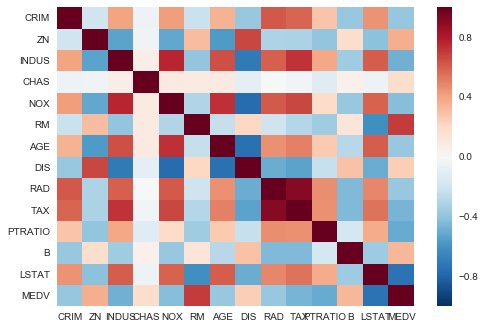

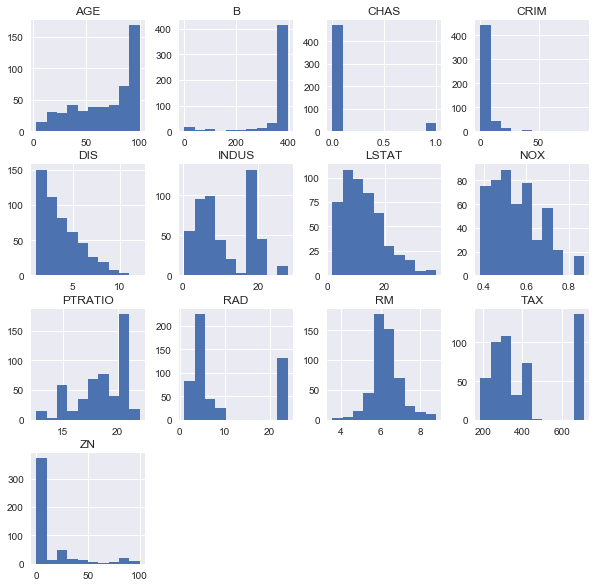

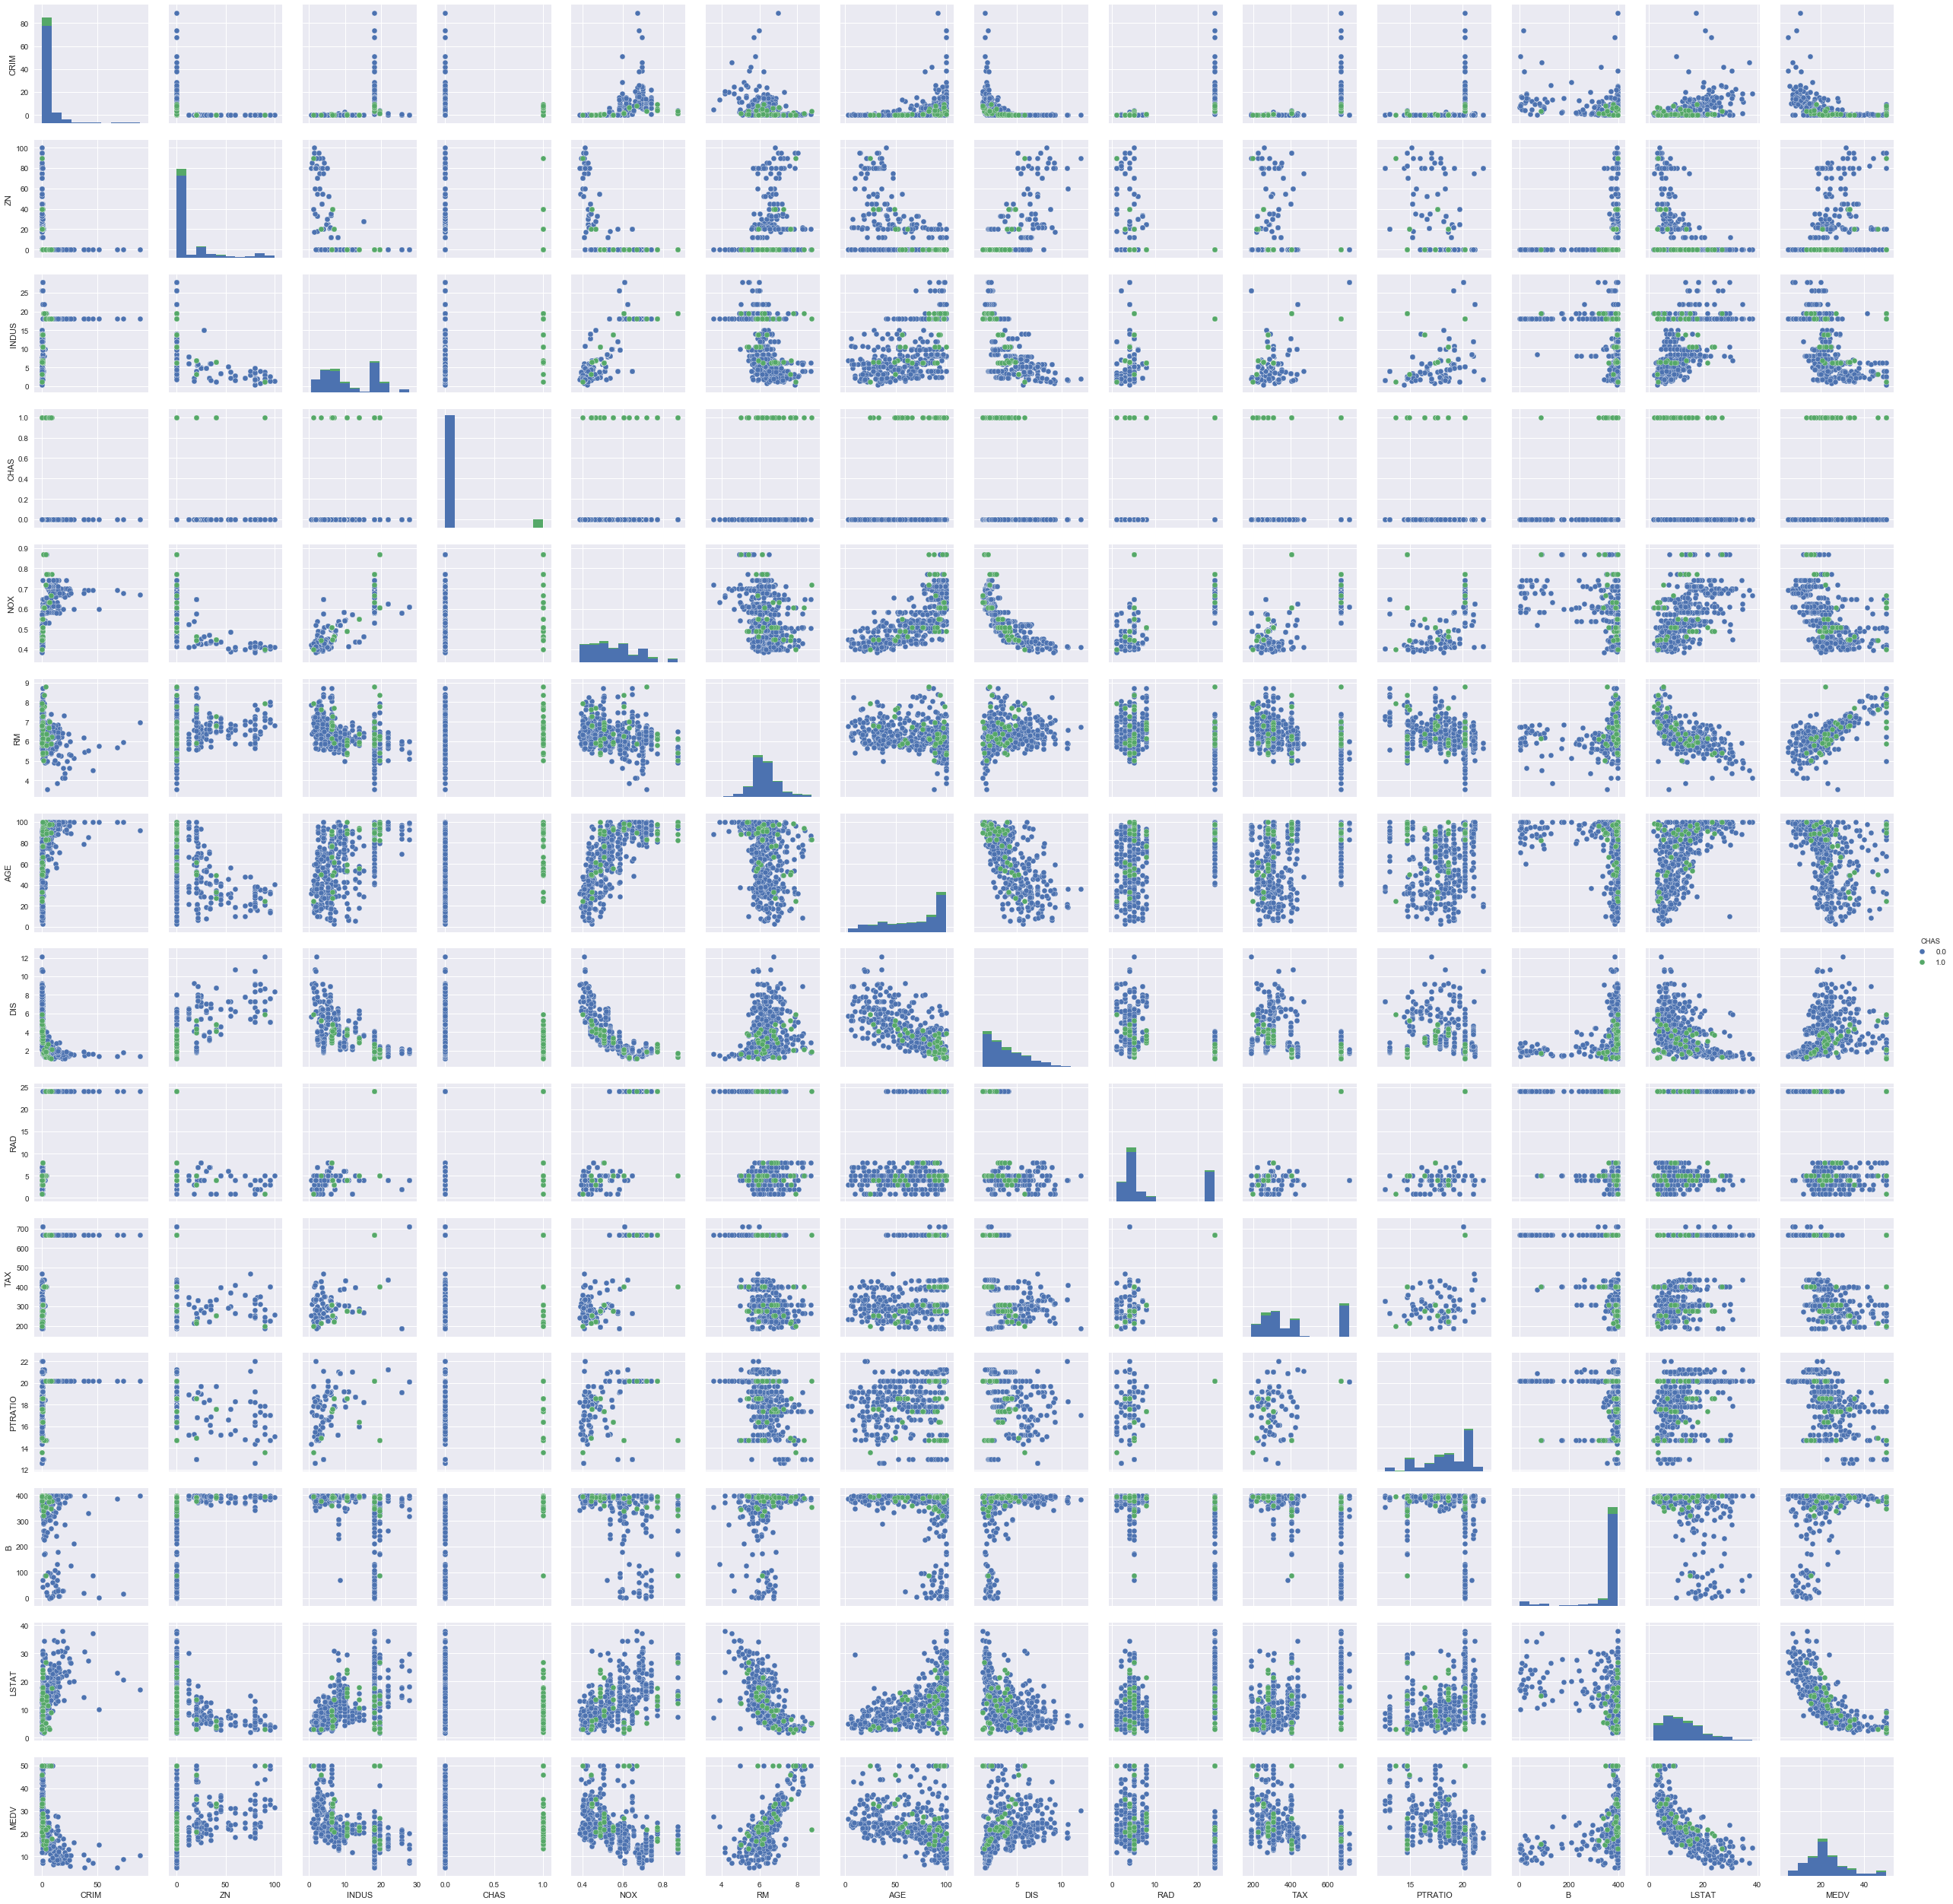

r-squared: 0.483525455991
p-value: 2.48722887101e-74


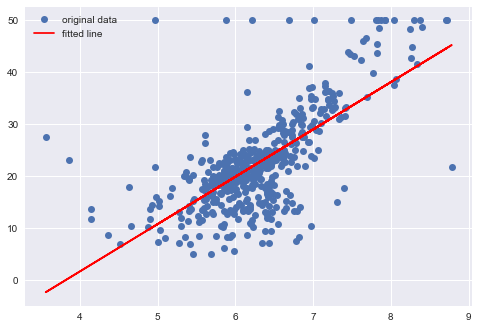

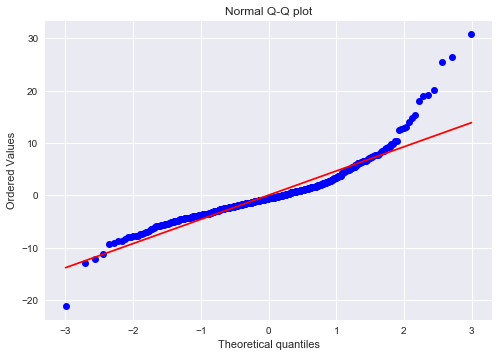

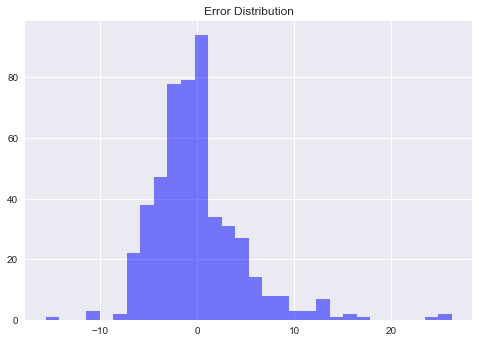

23.163535780935472

In [1]:
# =============================================================================
# Import Packages
# =============================================================================
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# =============================================================================
# Load Data
# =============================================================================
boston = load_boston()
boston.keys()
boston.data.shape
boston.feature_names
boston.DESCR

bos = pd.DataFrame(boston.data)    # numpy.ndarray -> pandas.Dataframe
bos.head()

bos.columns = boston.feature_names
bos['MEDV'] = boston.target
bos.head()

X = bos.drop('MEDV', axis = 1)
y = bos["MEDV"] 

"""
- CRIM per capita crime rate by town
- ZN proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS proportion of non-retail business acres per town
- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX nitric oxides concentration (parts per 10 million)
- RM average number of rooms per dwelling
- AGE proportion of owner-occupied units built prior to 1940
- DIS weighted distances to five Boston employment centres
- RAD index of accessibility to radial highways
- TAX full-value property-tax rate per $10,000
- PTRATIO pupil-teacher ratio by town
- B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT % lower status of the population
- MEDV Median value of owner-occupied homes in $1000's
"""

# =============================================================================
# EDA
# =============================================================================
# describe info
bos.describe()

# distinct values in each column
bos.apply(lambda x: x.nunique(), axis=0)   # Usually axis=0 is said to be "column-wise" and axis=1 "row-wise"

# missing values
bos.isnull().sum()

# correlation matrix
corr = bos.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

# distribution of each feature
bos.iloc[:,:13].hist(layout=(4,4), figsize = (10,10))
np.log(bos['DIS']).hist()    # take log on columns with heavy tail
np.log(bos['LSTAT']).hist()

# pairplot: check linear relationship (seems only RM and LSTAT has linear relationship with MEDV)
sns.pairplot(bos, hue="CHAS")
sns.plt.show()

# multicolinearity
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif


# =============================================================================
# Model 1: scipy.stats (simple linear regression) 
# =============================================================================
X_s = bos["RM"]       
y_s = bos["MEDV"]   

slope, intercept, r_value, p_value, std_err = stats.linregress(X_s, y_s)

print("r-squared:", r_value**2)
print("p-value:", p_value)

plt.plot(X_s, y_s, 'o', label='original data')
plt.plot(X_s, intercept + slope*X_s, 'r', label='fitted line')
plt.legend()
plt.show()


# =============================================================================
# Model 2: statsmodels.api
# =============================================================================
model = sm.OLS(y, X).fit()
model.summary()

pred = model.predict(X)  
res = model.resid         

# Distribution of residuals
stats.probplot(res, dist='norm', plot=plt)
plt.title("Normal Q-Q plot")
plt.show()


# Feature Selection
# Fitting models using R-style formulas
model1 = smf.ols(formula='MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT', data=bos).fit()
#model1.summary()

model2 = smf.ols(formula='MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + np.log(DIS) + RAD + TAX + PTRATIO + B + np.log(LSTAT)', data=bos).fit()
model2.summary()  

# remove features with high VIF: PTRATIO, NOX
model3 = smf.ols(formula='MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + np.log(DIS) + RAD + B + np.log(LSTAT)', data=bos).fit()
model3.summary()

# remove insignificant features
model4 = smf.ols(formula='MEDV ~ CRIM + CHAS + NOX + RM + np.log(DIS) + B + np.log(LSTAT)', data=bos).fit()
model4.summary()


# =============================================================================
# Model 3: sklearn.linear_model
# =============================================================================
model_sk = LinearRegression()
model_sk.fit(X, y)
pred = model_sk.predict(X)
mse_lr = np.mean((y - pred)**2)
mse_lr

# Distribution of residuals
plt.hist(y-pred, bins = 30, color = 'blue', alpha = 0.5, )
plt.title("Error Distribution")
plt.show()

# =============================================================================
# Ridge Regression
# =============================================================================
# closed form solution
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
pred_ridge = ridge_reg.predict(X)
mse_ridge = np.mean((y - pred_ridge)**2)
mse_ridge


# stochastic gradient descent
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
pred_ridge2 = sgd_reg.predict(X)
mse_ridge2 = np.mean((y - pred_ridge2)**2)
mse_ridge2


# =============================================================================
# Lasso Regression
# =============================================================================
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
pred_lasso = lasso_reg.predict(X)
mse_lasso = np.mean((y - pred_lasso)**2)
mse_lasso


# =============================================================================
# Elastic Net
# =============================================================================
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)   # l1_ratio corresponds to the mix ratio r
elastic_net.fit(X, y)
pred_en = elastic_net.predict(X)
mse_en = np.mean((y - pred_en)**2)
mse_en


## Reference
Assumption: http://people.duke.edu/~rnau/testing.htm

ANOVA: http://www.stat.ufl.edu/~winner/statnotescomp/regression.pdf

ANOVA Table: http://www.stat.yale.edu/Courses/1997-98/101/anovareg.htm

Hypothesis Test: http://reliawiki.org/index.php/Multiple_Linear_Regression_Analysis#Test_on_Individual_Regression_Coefficients_.28t__Test.29

Diagnostic Plot: https://medium.com/@emredjan/emulating-r-regression-plots-in-python-43741952c034

Variable Selection: http://www.biostat.jhsph.edu/~iruczins/teaching/jf/ch10.pdf

Machine Learning Mastery: https://machinelearningmastery.com/linear-regression-for-machine-learning/

Analytics Vidhya: https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/

Scipy Doc: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

Statsmodels Doc: http://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html

Sklearn Doc: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Confidence Intervals and Prediction Intervals: https://stats.stackexchange.com/questions/16493/difference-between-confidence-intervals-and-prediction-intervals/182816

Bias-Variance Tradeoff: https://elitedatascience.com/bias-variance-tradeoff

Bias-Variance Tradeoff Wikipedia: https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff

Pros and Cons: http://www.itl.nist.gov/div898/handbook/pmd/section1/pmd141.htm